<a href="https://colab.research.google.com/github/AlishDuwal10/Worksheet/blob/main/worksheet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AI_Workshop/IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [5]:
# Making a function for preprocessing
def preprocess_review(review):
  review = review.lower()
  # remove punctuation
  review = re.sub('[^a-z]', ' ', review)
  words = review.split()
  words = [ps.stem(word) for word in words if word not in stop_words]
  return ' '.join(words)

In [6]:
#Applying preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_review)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [7]:
# Converting th reviews sentiment to binary ie 0 and 1
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Split dataset to 80 / 20
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert text to Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [9]:
# Train Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_bow, y_train)

MultinomialNB()

In [10]:
# Predict on test set
y_pred = model.predict(X_test_bow)

# probability for ROC-AUC
y_prob = model.predict_proba(X_test_bow)[:,1]

In [11]:
# Calculating Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8494


In [12]:
# Calculating Precision, Recall, F1-score
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1-score: {f1}")

Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1-score: 0.8496405750798722


In [13]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4239  722]
 [ 784 4255]]


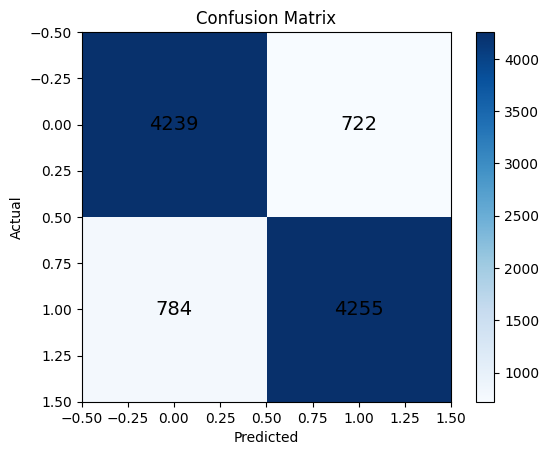

In [14]:

# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

# Add numbers inside the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)

plt.show()

ROC-AUC Score: 0.912517937591323


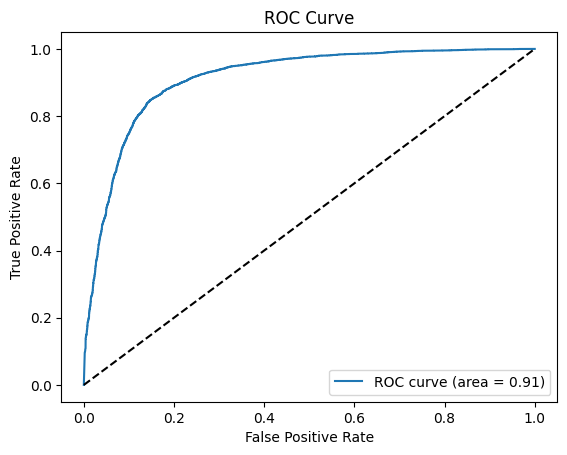

In [15]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Visualizing ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [16]:
pip install ucimlrepo

In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_prognostic.data.features
y = breast_cancer_wisconsin_prognostic.data.targets

X.head()


,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [18]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Columns:", X.columns)

Features shape: (198, 33)
Target shape: (198, 1)
Columns: Index(['Time', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'tumor_size', 'lymph_node_status'],
      dtype='object')


In [19]:
X.describe()

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,194.000000
mean,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.479276
min,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [20]:
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:", y.isnull().sum())

Missing values in features:
 Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     4
dtype: int64
Missing values in target: Outcome    0
dtype: int64


In [21]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Stratified train/test split to preserve class ratios
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (158, 33)
Testing set shape: (40, 33)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Initialize Logistic Regression with fixed random_state
logreg_all = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

# Drop rows with NaN values from X_train and X_test
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train.index.isin(X_train_cleaned.index)]

X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test.index.isin(X_test_cleaned.index)]

# Train on all features (cleaned data)
logreg_all.fit(X_train_cleaned, y_train_cleaned)

# Predict
y_pred_all = logreg_all.predict(X_test_cleaned)
y_prob_all = logreg_all.predict_proba(X_test_cleaned)[:,1]

In [26]:
# Metrics
print("Accuracy for all features:", accuracy_score(y_test, y_pred_all))
print("Precision:", precision_score(y_test, y_pred_all))
print("Recall:", recall_score(y_test, y_pred_all))
print("F1-score:", f1_score(y_test, y_pred_all))

Accuracy for all features: 0.75
Precision: 0.47058823529411764
Recall: 0.8888888888888888
F1-score: 0.6153846153846154


In [27]:
# Confusion Matrix
cm_all = confusion_matrix(y_test, y_pred_all)
print("Confusion Matrix:\n", cm_all)

Confusion Matrix:
 [[22  9]
 [ 1  8]]


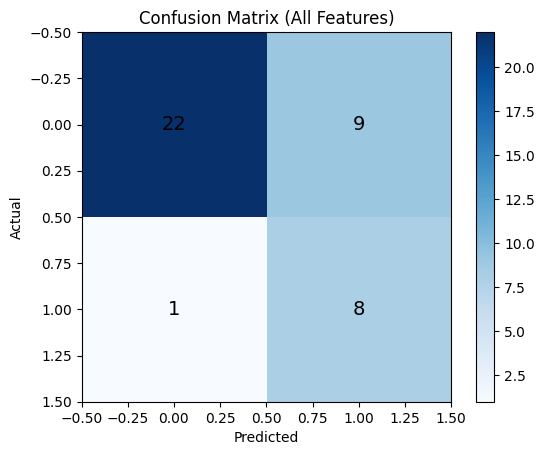

In [28]:
plt.imshow(cm_all, cmap='Blues')
plt.title("Confusion Matrix (All Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
for i in range(cm_all.shape[0]):
    for j in range(cm_all.shape[1]):
        plt.text(j, i, cm_all[i, j], ha='center', va='center', color='black', fontsize=14)
plt.show()

In [29]:
# ROC-AUC
roc_auc_all = roc_auc_score(y_test, y_prob_all)
print("ROC-AUC Score:", roc_auc_all)

ROC-AUC Score: 0.8458781362007168


In [31]:
# Initialize Logistic Regression for RFE
logreg = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

# RFE to rank all features and select top 5
rfe = RFE(estimator=logreg, n_features_to_select=5)
rfe.fit(X_train_cleaned, y_train_cleaned)

# Feature ranking DataFrame
feature_ranking = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Feature Rankings:\n", feature_ranking)

Feature Rankings:
                Feature  Ranking
12            texture2        1
9            symmetry1        1
26        compactness3        1
21             radius3        1
29           symmetry3        1
1              radius1        2
31          tumor_size        3
27          concavity3        4
28     concave_points3        5
30  fractal_dimension3        6
11             radius2        7
16        compactness2        8
25         smoothness3        9
22            texture3       10
10  fractal_dimension1       11
8      concave_points1       12
17          concavity2       13
32   lymph_node_status       14
13          perimeter2       15
5          smoothness1       16
14               area2       17
2             texture1       18
3           perimeter1       19
0                 Time       20
23          perimeter3       21
18     concave_points2       22
7           concavity1       23
15         smoothness2       24
6         compactness1       25
20  fractal_dimension

In [32]:
# Get top 5 features
top_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
print("Top 5 features:", top_features)

# Subset training and testing sets
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train model
model_top = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
model_top.fit(X_train_top, y_train)

# Predict
y_pred_top = model_top.predict(X_test_top)
y_prob_top = model_top.predict_proba(X_test_top)[:,1]

Top 5 features: ['texture2', 'symmetry1', 'compactness3', 'radius3', 'symmetry3']


In [33]:
# Metrics
print("Accuracy (top 5 features):", accuracy_score(y_test, y_pred_top))
print("Precision:", precision_score(y_test, y_pred_top))
print("Recall:", recall_score(y_test, y_pred_top))
print("F1-score:", f1_score(y_test, y_pred_top))

Accuracy (top 5 features): 0.575
Precision: 0.3181818181818182
Recall: 0.7777777777777778
F1-score: 0.45161290322580644


In [34]:
# Confusion Matrix
cm_top = confusion_matrix(y_test, y_pred_top)
print("Confusion Matrix:\n", cm_top)

Confusion Matrix:
 [[16 15]
 [ 2  7]]


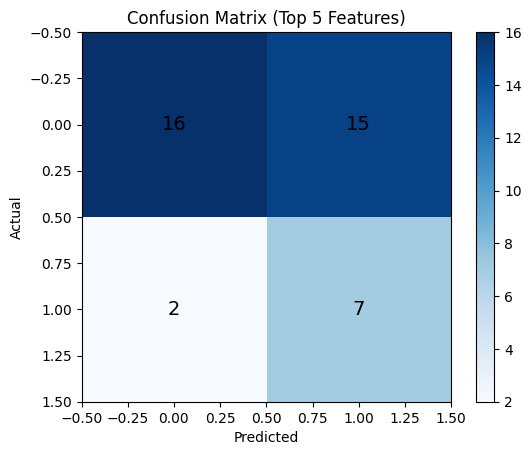

In [35]:
# Plot confusion matrix
plt.imshow(cm_top, cmap='Blues')
plt.title("Confusion Matrix (Top 5 Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
for i in range(cm_top.shape[0]):
    for j in range(cm_top.shape[1]):
        plt.text(j, i, cm_top[i, j], ha='center', va='center', color='black', fontsize=14)
plt.show()


In [36]:
# ROC-AUC
roc_auc_top = roc_auc_score(y_test, y_prob_top)
print("ROC-AUC (top 5 features):", roc_auc_top)

ROC-AUC (top 5 features): 0.6272401433691757


In [38]:
# Number of top features to test
feature_counts = [3, 5, 7, 10, 15]

# Store results
results = []

for n_features in feature_counts:
    # Initialize Logistic Regression for RFE
    logreg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)

    # RFE to select top n_features
    rfe = RFE(logreg, n_features_to_select=n_features)
    # Use cleaned data for RFE fitting
    rfe.fit(X_train_cleaned, y_train_cleaned)

    # Select features from the cleaned training set
    top_features = X_train_cleaned.columns[rfe.support_]
    X_train_top = X_train_cleaned[top_features]
    X_test_top = X_test_cleaned[top_features] # Use X_test_cleaned here

    # Train model
    model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
    # Use cleaned data for model training
    model.fit(X_train_top, y_train_cleaned)

    # Predict
    y_pred = model.predict(X_test_top)

    # Evaluate using y_test_cleaned
    acc = accuracy_score(y_test_cleaned, y_pred)
    prec = precision_score(y_test_cleaned, y_pred)
    rec = recall_score(y_test_cleaned, y_pred)
    f1 = f1_score(y_test_cleaned, y_pred)

    # Store results
    results.append({
        'Top Features': n_features,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results)
results_df

,Top Features,Accuracy,Precision,Recall,F1-score
0,3,0.550,0.285714,0.666667,0.400000
1,5,0.575,0.318182,0.777778,0.451613
2,7,0.650,0.333333,0.555556,0.416667
3,10,0.675,0.375000,0.666667,0.480000
4,15,0.650,0.352941,0.666667,0.461538


Feature Selection has a great impact on the models overall performance. By selecting the most important features simplifies the model while costing a little decrease in overall accuracy. it also reduces the computational cost. However using few features also causes the model underperform in other metrics like precision, recall and f1-scores even if overall accuracy remains similar especially while classifying the minority classes. In our dataset example it was "R". Thus, feature selection is a trade-off between simplicity and predictive power.